<a href="https://colab.research.google.com/github/Gabriela2685/Simulacion2/blob/main/Tres_metodos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import random as rnd
import numpy as np
import matplotlib.pyplot as plt
import math
import time

In [4]:
def f(x):
  return math.cos(((math.pi)*x)/2)

In [23]:
def MC(n,a,b):
  C = []
  for _ in range(n):
    x = rnd.random()    # Num aleatorio
    X_i = a + x*(b-a)
    g = f(X_i)          # Evalua X_i en la función
    C.append(g)
  return C

In [24]:
H = MC(100000,0,1)
print('La integral es igual a:',np.mean(H))

La integral es igual a: 0.6367412463384486


In [27]:
# Realizamos los experimentos
medias_muestrales = []  # Guardara todas las n medias muestrales
for _ in range(10000):
  G = MC(50,0,1)
  theta1 = np.mean(G)
  medias_muestrales.append(theta1)

estimacion_promedio = np.mean(medias_muestrales)   # Promedio de todas las muestras

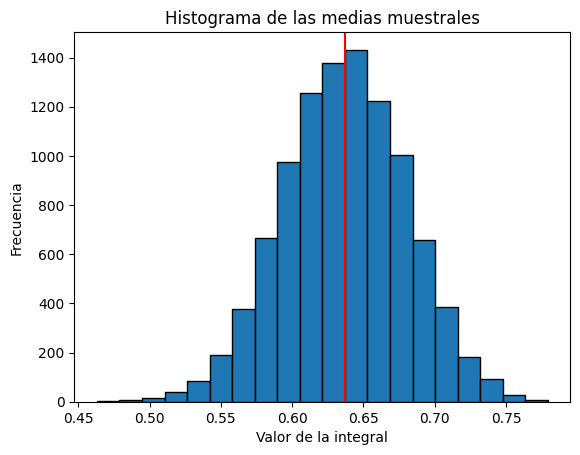

In [28]:
# Histograma
plt.hist(medias_muestrales, bins=20, edgecolor='black')
plt.title('Histograma de las medias muestrales')
plt.xlabel('Valor de la integral')
plt.ylabel('Frecuencia')
plt.axvline(estimacion_promedio, color='red')  #Valor de la integral

Muestreo importancia

In [40]:
def beta(x):
  return (3/2)*(1-x**2)

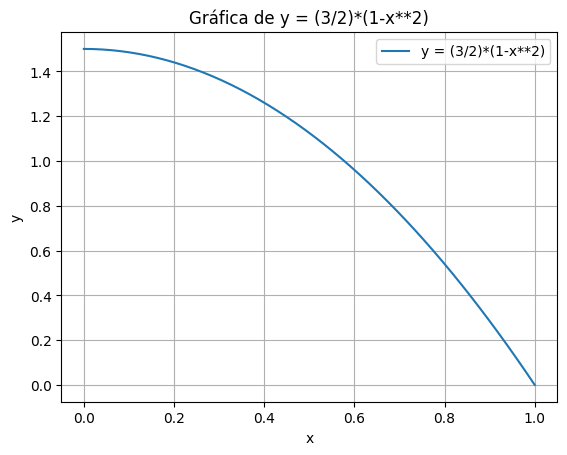

In [11]:
# Grafica de la función de distribución para vizualizar los máx
x = np.linspace(0, 1)
y=beta(x)
plt.plot(x,y,label='y = (3/2)*(1-x**2)')
plt.title('Gráfica de y = (3/2)*(1-x**2)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [41]:
def beta_acep(N):
    C=[] #Matriz vacia donde se almacenran los valores aceptados
    for i in range(N):
        y=rnd.random() # Variable que sigue la distribucion g(x)
        u= np.random.uniform(0, 1) # Variable que sigue una distribucion uniforma
        if u<=beta(y)/beta(0):
            C.append(y)
    return C

G = beta_acep(100000)

(array([ 970.,  952., 1003., 1009., 1073.,  974., 1011.,  949.,  987.,
         981.,  932.,  964.,  982., 1000., 1015.,  915.,  959.,  983.,
         926., 1006.,  964.,  965.,  922.,  933.,  969.,  956.,  971.,
         861.,  924.,  899.,  917.,  933.,  912.,  846.,  881.,  829.,
         803.,  823.,  843.,  834.,  850.,  824.,  796.,  787.,  810.,
         808.,  807.,  741.,  818.,  731.,  779.,  802.,  691.,  720.,
         711.,  701.,  669.,  672.,  682.,  632.,  625.,  643.,  632.,
         646.,  581.,  594.,  541.,  545.,  490.,  472.,  538.,  471.,
         472.,  449.,  419.,  453.,  443.,  381.,  377.,  395.,  346.,
         341.,  322.,  305.,  259.,  261.,  239.,  237.,  224.,  236.,
         177.,  175.,  159.,  120.,   99.,   92.,   87.,   49.,   49.,
          15.]),
 array([9.77443562e-06, 9.99140321e-03, 1.99730320e-02, 2.99546608e-02,
        3.99362895e-02, 4.99179183e-02, 5.98995471e-02, 6.98811759e-02,
        7.98628046e-02, 8.98444334e-02, 9.98260622e-02, 1.

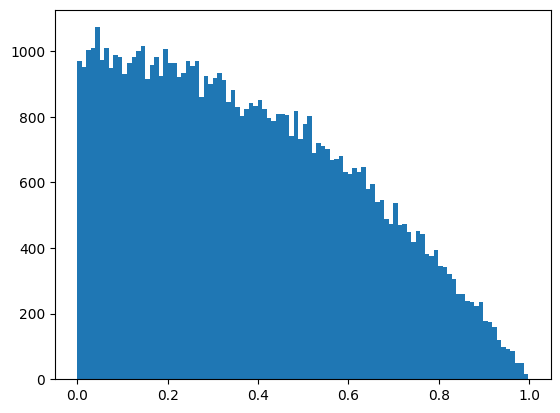

In [43]:
# Crear histograma para visualizar la distribución
plt.hist(G, bins=100)



In [37]:
def evaluados(N): # Funcion para obtener sustituir valores aceptados fe la funcion
  lista = []
  C = beta_acep(N)  # Se crea la lista con los valores aceptados
  for valor in C:   # Se evalua cada valor de la lista en f(x)
    lista.append(f(valor))   # Se agregan

  return lista

In [38]:
resultados = evaluados(100000)
mu = np.mean(resultados)  # Promedio de los resultados de las sustituciones
print(mu)

0.7730194806417289
